In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 68.5MB/s 
     |████████████████████████████████| 460kB 51.4MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import numpy as np
import re
import konlpy
import matplotlib.pyplot as plt

In [4]:
#데이터 불러오기
df=pd.read_csv("/content/자사리뷰_cleansed.csv",encoding='cp949')

In [5]:
df

,Unnamed: 0,rating,date,text,photo
0,0,5,202101,유산균 바꿔가면서 맞는 제품 찾는 중인데 잘못 먹으면 오히려 화장실 잘못 가고 속이...,0
1,1,3,202101,개별 포장 말거 그냥 한 달 치 나왔으면 좋겠음,1
2,2,4,202101,하루 치가 개별 포장되어 있어 먹기 편해 요 성분 함유량도 나쁘지 않고요,0
3,3,3,202101,좋은지 잘 모르겠는데 꾸준하게 먹어볼게요,0
4,4,5,202101,꾸준히 먹고 있는데 좋아요,1
...,...,...,...,...,...
25882,25882,5,201807,개별 포장 편하고 좋네요,0
25883,25883,5,201807,여자친구님께서 매우 만족하셨습니다,0
25884,25884,5,201807,좋은 구성이네요 효과 봤으면 좋겠네요,0
25885,25885,5,201806,이제 받았어요,0


In [10]:
df_te=df.text

In [15]:
df_te

0        유산균 바꿔가면서 맞는 제품 찾는 중인데 잘못 먹으면 오히려 화장실 잘못 가고 속이...
1                               개별 포장 말거 그냥 한 달 치 나왔으면 좋겠음
2                 하루 치가 개별 포장되어 있어 먹기 편해 요 성분 함유량도 나쁘지 않고요
3                                   좋은지 잘 모르겠는데 꾸준하게 먹어볼게요
4                                           꾸준히 먹고 있는데 좋아요
                               ...                        
25882                                        개별 포장 편하고 좋네요
25883                                   여자친구님께서 매우 만족하셨습니다
25884                                 좋은 구성이네요 효과 봤으면 좋겠네요
25885                                              이제 받았어요
25886                  배송이 좀 늦었어 요원하는 날부터 시작은 못했지만 기대해 봅니다
Name: text, Length: 25887, dtype: object

In [25]:
target_words = ['재구매']  

In [26]:
#재구매라는 단어만 들어간 text 추출
len_target_words = len(target_words)
total_length = len(df)
cat = []
for i in range(total_length) : 
    if target_words[0] in df.loc[i,'text']: 
        cat.append(True)
    else :
        cat.append(False)

In [27]:
df_target = df.loc[cat,:]
df_target


,Unnamed: 0,rating,date,text,photo
7,7,5,202101,매일매일 챙겨 먹고 하루하루 달라짐이 보여요 재구매율 뿜뿜입니다,0
23,23,4,202101,주먹 이어본 결과 몸은 가벼워진 거 같은데 체중은 변화 없음 식이요법도 했어요 재구...,0
31,31,5,202101,몇 번째 재구매인지 모르겠어요 아무거나 영양제 못 먹는데 다른 부작용 없이 잘 먹고...,0
54,54,5,202101,늘 먹던 제품입니다 재구매했습니다,0
62,62,5,202101,다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요,0
...,...,...,...,...,...
25471,25471,5,201809,아직 먹어보진 않았지만 좋으면 좋겠네요 먹어보고 좋으면 재구매 할게요,0
25472,25472,5,201809,재구매 괜찮아 소,0
25497,25497,3,201809,아직 먹고 있는 중이라서 잘은 모르겠지만 조금씩 냉이 줄고 있는 거 같아요 다 먹은...,0
25691,25691,5,201809,먹고 나서 과연 재구매할 찌 두고 보게 쓰여,0


In [37]:
#df_target을 csv 파일로 저장
df_target.to_csv("review_target.csv",header=True)

In [42]:
review4us = pd.read_csv("/content/review_target.csv")
review4us

,Unnamed: 0,Unnamed: 0.1,rating,date,text,photo
0,7,7,5,202101,매일매일 챙겨 먹고 하루하루 달라짐이 보여요 재구매율 뿜뿜입니다,0
1,23,23,4,202101,주먹 이어본 결과 몸은 가벼워진 거 같은데 체중은 변화 없음 식이요법도 했어요 재구...,0
2,31,31,5,202101,몇 번째 재구매인지 모르겠어요 아무거나 영양제 못 먹는데 다른 부작용 없이 잘 먹고...,0
3,54,54,5,202101,늘 먹던 제품입니다 재구매했습니다,0
4,62,62,5,202101,다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요,0
...,...,...,...,...,...,...
1473,25471,25471,5,201809,아직 먹어보진 않았지만 좋으면 좋겠네요 먹어보고 좋으면 재구매 할게요,0
1474,25472,25472,5,201809,재구매 괜찮아 소,0
1475,25497,25497,3,201809,아직 먹고 있는 중이라서 잘은 모르겠지만 조금씩 냉이 줄고 있는 거 같아요 다 먹은...,0
1476,25691,25691,5,201809,먹고 나서 과연 재구매할 찌 두고 보게 쓰여,0


In [41]:
target_words = ['유산균','소화','배변','화장실','변비','똥','쾌변','액티블리','냉','응가']  

In [43]:
#target_words 10개가 들어간 text만 추출
len_target_words = len(target_words)
total_length = len(review4us)
cat = []
for i in range(total_length) : 
    if target_words[0] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[1] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[2] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[3] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[4] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[5] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[6] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[7] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[8] in review4us.loc[i,'text']: 
        cat.append(True)
    elif target_words[9] in review4us.loc[i,'text']: 
        cat.append(True)
    else :
        cat.append(False)

In [44]:
review4us_target = review4us.loc[cat,:]

In [45]:
review4us_target

,Unnamed: 0,Unnamed: 0.1,rating,date,text,photo
4,62,62,5,202101,다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요,0
7,74,74,4,202101,이제 유산균 없음 안 돼요 떨어지기 전에 항상 재구매합니다,1
22,310,310,5,202012,으로 이주 동안 두통 먹었고 사진과 같이 날짜 써두고 빼먹지 않고 꾸준히 먹었습니다...,1
28,470,470,5,202011,항상 재구매하는 유산균입니다 이번 행사 기간에 많이 구매해 놓으니 맘이 편합니다,1
31,575,575,5,202011,일단 식후 먹어보니 괜찮더라고 요 비타민 포함 재구매해서 지인들께 선물했는데 좋아합...,1
...,...,...,...,...,...,...
1423,24376,24376,5,201811,먹어봤는데 여성 유산균은 하루 만에 효과가 오더라고요 만족해서 재구매합니다,0
1451,24923,24923,5,201810,액티 머리가 인기 제품이라 그런지 종 세트 주문하고도 따로 배송받았어요 재구매인데 ...,0
1455,25071,25071,5,201810,타사 제품도 먹어봤는데 두통이랑 울렁거림이 심했어요 요거는 일째 먹어도 그런 현상 ...,0
1475,25497,25497,3,201809,아직 먹고 있는 중이라서 잘은 모르겠지만 조금씩 냉이 줄고 있는 거 같아요 다 먹은...,0


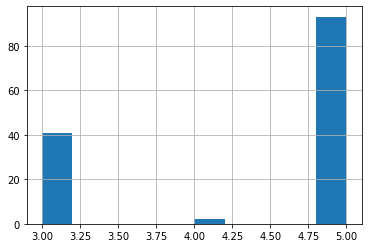

In [46]:
review4us_target.rating.hist() #별점 시각화

In [47]:
df_str=review4us_target.text

In [48]:
df_str

4                         다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요
7                        이제 유산균 없음 안 돼요 떨어지기 전에 항상 재구매합니다
22      으로 이주 동안 두통 먹었고 사진과 같이 날짜 써두고 빼먹지 않고 꾸준히 먹었습니다...
28           항상 재구매하는 유산균입니다 이번 행사 기간에 많이 구매해 놓으니 맘이 편합니다
31      일단 식후 먹어보니 괜찮더라고 요 비타민 포함 재구매해서 지인들께 선물했는데 좋아합...
                              ...                        
1423            먹어봤는데 여성 유산균은 하루 만에 효과가 오더라고요 만족해서 재구매합니다
1451    액티 머리가 인기 제품이라 그런지 종 세트 주문하고도 따로 배송받았어요 재구매인데 ...
1455    타사 제품도 먹어봤는데 두통이랑 울렁거림이 심했어요 요거는 일째 먹어도 그런 현상 ...
1475    아직 먹고 있는 중이라서 잘은 모르겠지만 조금씩 냉이 줄고 있는 거 같아요 다 먹은...
1477    배송 빠르고요 먹는 유산균이 있는데 여성 유산균이라 해서 질렀는데 재구매할 수 있게...
Name: text, Length: 136, dtype: object

In [50]:
dataframe=pd.DataFrame(df_str)
dataframe.to_csv("review_text.csv",header=True)

with open(r'/content/review_text.csv','r') as f:
    text=f.readlines()

In [51]:
text

[',text\n',
 '4,다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요\n',
 '7,이제 유산균 없음 안 돼요 떨어지기 전에 항상 재구매합니다\n',
 '22,으로 이주 동안 두통 먹었고 사진과 같이 날짜 써두고 빼먹지 않고 꾸준히 먹었습니다 내일이 마지막 날인데 가장 좋았던 점은 배변활동이 원활해서 매일 화장실을 간 것입니다 어떤 보조제를 먹든 체중 감량을 위해선 기본적으로 운동과 식이 관리가 필수이고 보조제는 보조제이기 때문에 섭취만으로 다이어트를 할 순 없지만 식이조절 시 찾아올 수 있는 변비는 확실히 해결해주는 것 같습니다 그래서 전 또 재구매하려 합니다\n',
 '28,항상 재구매하는 유산균입니다 이번 행사 기간에 많이 구매해 놓으니 맘이 편합니다\n',
 '31,일단 식후 먹어보니 괜찮더라고 요 비타민 포함 재구매해서 지인들께 선물했는데 좋아합니다 변비도 어느 정도 효과가 있는 것 같고 셀레늄 포함돼 어서 구매했는데 잘한 것 같습니다 매번 주문하려 구요\n',
 '46,요즘 소량으로 먹어서 변비가 심한 데 이거 먹고 변비 탈출 다 먹어가면 또 재구매하겠습니다\n',
 '51,확실히 냉이 덜 나오는 거 같아 재구매해서 계속 먹고 있어요\n',
 '76,본품보다 사은품은 더 많아서 잘못 주문했는지 알고 주문 내역 다시 확인했어요 주먹어보구 살 빠지는 건 모르겠고요 만성 변비가 살아져서 재구매해요 전 변비 해결만으로도 또 구매할 거 같아요\n',
 '84,화장실 가기가 너무 편해졌어요 아직 몸무게 변화는 없으나 만족해 재구매 의사 있어요\n',
 '98,효과 너무 느껴서 줄짜리 하나는 제가 하나는 동생 보내주려고 따로 두 개 샀어요 락이 틀리는 첨엔 사기당했나 싶은데 정확히 먹은 지주 때부터 효과나 오 구 요일 단 변비인데 그게 싹 고쳐졌습니다 꾸준히 오래 드시면 더 효과 보실 듯하고요 먹다가 안 먹으면 확실히 알아라 이틀리 계속 먹어야 하는구나라는 생각이 들어서 재구매하시게 될 겁니다\n',
 '106,화장실 효과 잘 보는 것 같아서 한

In [52]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',text 4,다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요 7,이제 유산균 없음 안 돼요 떨어지기 전에 항상 재구매합니다 22,으로 이주 동안 두통 먹었고 사진과 같이 날짜 써두고 빼먹지 않고 꾸준히 먹었습니다 내일이 마지막 날인데 가장 좋았던 점은 배변활동이 원활해서 매일 화장실을 간 것입니다 어떤 보조제를 먹든 체중 감량을 위해선 기본적으로 운동과 식이 관리가 필수이고 보조제는 보조제이기 때문에 섭취만으로 다이어트를 할 순 없지만 식이조절 시 찾아올 수 있는 변비는 확실히 해결해주는 것 같습니다 그래서 전 또 재구매하려 합니다 28,항상 재구매하는 유산균입니다 이번 행사 기간에 많이 구매해 놓으니 맘이 편합니다 31,일단 식후 먹어보니 괜찮더라고 요 비타민 포함 재구매해서 지인들께 선물했는데 좋아합니다 변비도 어느 정도 효과가 있는 것 같고 셀레늄 포함돼 어서 구매했는데 잘한 것 같습니다 매번 주문하려 구요 46,요즘 소량으로 먹어서 변비가 심한 데 이거 먹고 변비 탈출 다 먹어가면 또 재구매하겠습니다 51,확실히 냉이 덜 나오는 거 같아 재구매해서 계속 먹고 있어요 76,본품보다 사은품은 더 많아서 잘못 주문했는지 알고 주문 내역 다시 확인했어요 주먹어보구 살 빠지는 건 모르겠고요 만성 변비가 살아져서 재구매해요 전 변비 해결만으로도 또 구매할 거 같아요 84,화장실 가기가 너무 편해졌어요 아직 몸무게 변화는 없으나 만족해 재구매 의사 있어요 98,효과 너무 느껴서 줄짜리 하나는 제가 하나는 동생 보내주려고 따로 두 개 샀어요 락이 틀리는 첨엔 사기당했나 싶은데 정확히 먹은 지주 때부터 효과나 오 구 요일 단 변비인데 그게 싹 고쳐졌습니다 꾸준히 오래 드시면 더 효과 보실 듯하고요 먹다가 안 먹으면 확실히 알아라 이틀리 계속 먹어야 하는구나라는 생각이 들어서 재구매하시게 될 겁니다 106,화장실 효과 잘 보는 것 같아서 한 달 치먹어보다 가 세 달 치 재구매했어요 116,예전에 여성 유산균 처음 알았을 때 먹어봤었었는데 괜찮아서 한참 다른 

In [53]:
#특수문자 제거
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' text 4 다이어트 효과도 있고 변비엔 최고인 거 같아 재구매했네요 7 이제 유산균 없음 안 돼요 떨어지기 전에 항상 재구매합니다 22 으로 이주 동안 두통 먹었고 사진과 같이 날짜 써두고 빼먹지 않고 꾸준히 먹었습니다 내일이 마지막 날인데 가장 좋았던 점은 배변활동이 원활해서 매일 화장실을 간 것입니다 어떤 보조제를 먹든 체중 감량을 위해선 기본적으로 운동과 식이 관리가 필수이고 보조제는 보조제이기 때문에 섭취만으로 다이어트를 할 순 없지만 식이조절 시 찾아올 수 있는 변비는 확실히 해결해주는 것 같습니다 그래서 전 또 재구매하려 합니다 28 항상 재구매하는 유산균입니다 이번 행사 기간에 많이 구매해 놓으니 맘이 편합니다 31 일단 식후 먹어보니 괜찮더라고 요 비타민 포함 재구매해서 지인들께 선물했는데 좋아합니다 변비도 어느 정도 효과가 있는 것 같고 셀레늄 포함돼 어서 구매했는데 잘한 것 같습니다 매번 주문하려 구요 46 요즘 소량으로 먹어서 변비가 심한 데 이거 먹고 변비 탈출 다 먹어가면 또 재구매하겠습니다 51 확실히 냉이 덜 나오는 거 같아 재구매해서 계속 먹고 있어요 76 본품보다 사은품은 더 많아서 잘못 주문했는지 알고 주문 내역 다시 확인했어요 주먹어보구 살 빠지는 건 모르겠고요 만성 변비가 살아져서 재구매해요 전 변비 해결만으로도 또 구매할 거 같아요 84 화장실 가기가 너무 편해졌어요 아직 몸무게 변화는 없으나 만족해 재구매 의사 있어요 98 효과 너무 느껴서 줄짜리 하나는 제가 하나는 동생 보내주려고 따로 두 개 샀어요 락이 틀리는 첨엔 사기당했나 싶은데 정확히 먹은 지주 때부터 효과나 오 구 요일 단 변비인데 그게 싹 고쳐졌습니다 꾸준히 오래 드시면 더 효과 보실 듯하고요 먹다가 안 먹으면 확실히 알아라 이틀리 계속 먹어야 하는구나라는 생각이 들어서 재구매하시게 될 겁니다 106 화장실 효과 잘 보는 것 같아서 한 달 치먹어보다 가 세 달 치 재구매했어요 116 예전에 여성 유산균 처음 알았을 때 먹어봤었었는데 괜찮아서 한참 다른 

In [76]:
#품사 태깅
komoran = konlpy.tag.Komoran(userdic='/content/DICT.txt')
komoran_morphs=komoran.pos(filtered_content)
print(komoran_morphs)

[('text', 'SL'), ('4', 'SN'), ('다이어트', 'NNP'), ('효과', 'NNG'), ('도', 'JX'), ('있', 'VV'), ('고', 'EC'), ('변비', 'NNP'), ('에', 'JKB'), ('ㄴ', 'JX'), ('최고', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETM'), ('거', 'NNB'), ('같', 'VA'), ('아', 'EC'), ('재구매', 'NNG'), ('하', 'XSV'), ('았', 'EP'), ('네요', 'EC'), ('7', 'SN'), ('이제', 'MAG'), ('유산균', 'NNG'), ('없', 'VA'), ('음', 'ETN'), ('안', 'MAG'), ('되', 'VV'), ('어요', 'EC'), ('떨어지', 'VV'), ('기', 'ETN'), ('전', 'NNG'), ('에', 'JKB'), ('항상', 'MAG'), ('재구매', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EC'), ('22', 'SN'), ('으로', 'JKB'), ('이주', 'NNP'), ('동안', 'NNG'), ('두통', 'NNP'), ('먹', 'VV'), ('었', 'EP'), ('고', 'EC'), ('사진', 'NNG'), ('과', 'JC'), ('같이', 'MAG'), ('날짜', 'NNP'), ('쓰', 'VV'), ('어', 'EC'), ('두', 'VX'), ('고', 'EC'), ('빼먹', 'VV'), ('지', 'EC'), ('않', 'VX'), ('고', 'EC'), ('꾸준히', 'MAG'), ('먹', 'VV'), ('었', 'EP'), ('습니다', 'EC'), ('내일', 'NNG'), ('이', 'JKS'), ('마지막', 'NNG'), ('날', 'NNG'), ('이', 'VCP'), ('ㄴ데', 'EC'), ('가장', 'MAG'), ('좋', 'VA'), ('았', 'EP'), ('던', 'ETM'), ('점', 'NNB'),

In [78]:
from collections import Counter
words = [word for word, pos in komoran_morphs if not pos == "EC"] # 단어 중 '어미' 제거
unique_words = set(words)
for word in unique_words:
    if len(word) == 1:
        while word in words:
            words.remove(word)
            
words

c = Counter(words)

In [79]:
print(c.most_common(30))

[('재구매', 143), ('화장실', 58), ('유산균', 46), ('효과', 43), ('빠지', 23), ('변비', 22), ('구매', 22), ('확실히', 19), ('모르', 18), ('너무', 17), ('많이', 15), ('진짜', 15), ('정말', 15), ('꾸준히', 14), ('편하', 14), ('계속', 14), ('으로', 13), ('느끼', 13), ('여성', 13), ('나오', 12), ('보다', 12), ('다른', 12), ('액티블리', 12), ('같이', 11), ('배변', 11), ('냉이', 11), ('의사', 10), ('활동', 9), ('포장', 9), ('좋아서', 9)]


**Word Cloud**

In [80]:
#명사만 추출
print(komoran.nouns(filtered_content))
komoran_nouns=komoran.nouns(filtered_content)

['다이어트', '효과', '변비', '최고', '거', '재구매', '유산균', '전', '재구매', '이주', '동안', '두통', '사진', '날짜', '내일', '마지막', '날', '점', '배변', '활동', '원활', '화장실', '간', '것', '보조', '체중', '감량', '기본', '운동', '식', '관리', '필수', '보조', '보조', '때문', '섭취', '만', '다이어트', '식이', '조절', '시', '수', '변비', '해결', '것', '재구매', '재구매', '유산균', '이번', '행사', '기간', '구매', '맘', '식후', '비타민', '포함', '재구매', '지인', '선물', '변비', '정도', '효과', '것', '셀레늄', '포함', '구매', '것', '주문', '요', '요즘', '소량', '변비', '데', '변비', '탈출', '재구매', '냉이', '거', '재구매', '품', '사은품', '주문', '주문', '내역', '확인', '주먹', '어보', '구', '건', '만성', '변비', '재구매', '변비', '해결', '구매', '거', '화장실', '몸무게', '변화', '만족', '재구매', '의사', '효과', '줄', '제가', '동생', '개', '락', '첨', '사기', '지주', '때', '효과', '오', '구', '요일', '변비', '효과', '듯', '이틀', '리', '생각', '재구매', '겁', '니다', '화장실', '효과', '것', '달', '치', '달', '치', '재구매', '예전', '여성', '유산균', '처음', '때', '한참', '거', '재구매', '시작', '지', '틀', '그때', '효과', '기대', '용', '배', '송도', '사은품', '대박', '감사', '번', '재구매', '효과', '차이', '장', '여성', '유산균', '질염', '분비물', '게', '건강', '게', '장이', '것', '친구', '추천', '

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [82]:
FONT_PATH='/content/DXHanlgrum-KSCpc-EUC-H.ttf'

In [83]:
noun_text=' '.join(komoran_nouns)
print(noun_text)

다이어트 효과 변비 최고 거 재구매 유산균 전 재구매 이주 동안 두통 사진 날짜 내일 마지막 날 점 배변 활동 원활 화장실 간 것 보조 체중 감량 기본 운동 식 관리 필수 보조 보조 때문 섭취 만 다이어트 식이 조절 시 수 변비 해결 것 재구매 재구매 유산균 이번 행사 기간 구매 맘 식후 비타민 포함 재구매 지인 선물 변비 정도 효과 것 셀레늄 포함 구매 것 주문 요 요즘 소량 변비 데 변비 탈출 재구매 냉이 거 재구매 품 사은품 주문 주문 내역 확인 주먹 어보 구 건 만성 변비 재구매 변비 해결 구매 거 화장실 몸무게 변화 만족 재구매 의사 효과 줄 제가 동생 개 락 첨 사기 지주 때 효과 오 구 요일 변비 효과 듯 이틀 리 생각 재구매 겁 니다 화장실 효과 것 달 치 달 치 재구매 예전 여성 유산균 처음 때 한참 거 재구매 시작 지 틀 그때 효과 기대 용 배 송도 사은품 대박 감사 번 재구매 효과 차이 장 여성 유산균 질염 분비물 게 건강 게 장이 것 친구 추천 휴대 포장 면 함 배송 것 이번 이벤트 거주 위 사람 영업 살 느낌 건 화장실 가요 만족 재구매 의사 번 재구매 유지 변비 화장실 직 방 때 재구매 중 냉 냄새 유산균 재구매 성비 재구매 재구매 유산균 곳 다이어트 랑 피부 콜라겐 사서 중 화장실 재구매 위클리랩 유산균 첨 사 재구매 것 화장실 효과 좋아서 라 이틀 리 재구매 화장실 것 재구매 재구매 유산균 당 효과 나름 거 제품 할인 때 할인 끝 개 구입 번 재구매 요일 심 죄책감 수 화장실 거 몸무게 변화 배 배 화장실 완전 하루 번 큰일 주먹 코 화장실 게 재구매 생각 재구매 것 중 효과 배변 활동 콜라겐 광고 리뷰 좋아서 주문 유산균 것 결과 재구매 화장실 가요 재구매 의사 배송 감사 살 변비 해결 듯 해서 재구매 엄마 화장실 재구매 게 변비 것 살 듯 변비 변비 해결 때문 재구매 유산균 편 이번 위클 리 트랩 세일 사 봉지 화장실 것 재구매 여자 보니 일반 유산균 건강 유산균 게 것 기대 재구매 화장실 가요 재구매 건 화장실 가요 아침 복용

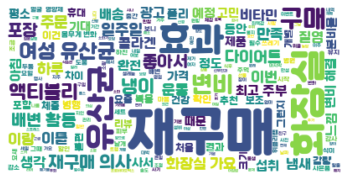

In [84]:
wordcloud=WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH,background_color='white')
wordcloud.generate(noun_text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**네트워크분석**

In [85]:
import networkx as nx

In [86]:
selected_words = [word for word, n in c.most_common(50)]
print(selected_words) 

['재구매', '화장실', '유산균', '효과', '빠지', '변비', '구매', '확실히', '모르', '너무', '많이', '진짜', '정말', '꾸준히', '편하', '계속', '으로', '느끼', '여성', '나오', '보다', '다른', '액티블리', '같이', '배변', '냉이', '의사', '활동', '포장', '좋아서', '다이어트', '주문', '심하', '다시', '자주', '가요', '일주일', '항상', '운동', '이번', '만족', '이틀', '하루', '챙기', '이랑', '비타민', '이것', '아직', '생각', '빠르']


In [90]:
#재구매로 이미 추출한 열들이기 때문에 재구매는 제외하고 단어 선택
del selected_words[0]
selected_words

['효과',
 '빠지',
 '변비',
 '구매',
 '확실히',
 '모르',
 '너무',
 '많이',
 '진짜',
 '정말',
 '꾸준히',
 '편하',
 '계속',
 '으로',
 '느끼',
 '여성',
 '나오',
 '보다',
 '다른',
 '액티블리',
 '같이',
 '배변',
 '냉이',
 '의사',
 '활동',
 '포장',
 '좋아서',
 '다이어트',
 '주문',
 '심하',
 '다시',
 '자주',
 '가요',
 '일주일',
 '항상',
 '운동',
 '이번',
 '만족',
 '이틀',
 '하루',
 '챙기',
 '이랑',
 '비타민',
 '이것',
 '아직',
 '생각',
 '빠르']

In [91]:
import itertools

In [92]:
def add_ties(g, sentence):
    if len(sentence) > 0 :
        selected_words=list(g.nodes())
        for pair in list(itertools.combinations(set(sentence), 2)):
            if pair[0] == pair[1]:
                continue
            if pair[0] in selected_words and pair[1] in selected_words:
                if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()): 
                    g[pair[0]][pair[1]]['weight'] += 1
                else:
                    g.add_edge(pair[0], pair[1], weight=1 )
        return g
    else:
        return g

In [93]:
def form_network(g, sentences):
    for sentence in sentences:
        g = add_ties(g, sentence)
        
    return g

In [94]:
def do_kr_sna(sentences, selected_words):
    G = nx.Graph()
    G.add_nodes_from(selected_words)
    G = form_network(G, sentences)
    
    return G

In [95]:
sentences = []
for i in range(len(text)):
    result = komoran.pos(text[i])
    result2 = [word for word, pos in result if not pos == "EC"]
    result3 = [word for word in result2 if not len(word) == 1]
    if result3 != []:
        sentences.append(result3)
    
sentences   

[['text'],
 ['다이어트', '효과', '변비', '최고', '재구매'],
 ['이제', '유산균', '떨어지', '항상', '재구매'],
 ['22',
  '으로',
  '이주',
  '동안',
  '두통',
  '사진',
  '같이',
  '날짜',
  '빼먹',
  '꾸준히',
  '내일',
  '마지막',
  '가장',
  '배변',
  '활동',
  '원활',
  '매일',
  '화장실',
  '어떤',
  '보조',
  '체중',
  '감량',
  '위하',
  '기본',
  '으로',
  '운동',
  '관리',
  '필수',
  '보조',
  '보조',
  '때문',
  '섭취',
  '으로',
  '다이어트',
  '식이',
  '조절',
  '찾아오',
  '변비',
  '확실히',
  '해결',
  '그래서',
  '재구매'],
 ['28', '항상', '재구매', '유산균', '이번', '행사', '기간', '많이', '구매', '편하'],
 ['31',
  '일다',
  '식후',
  '괜찮',
  '비타민',
  '포함',
  '재구매',
  '지인',
  '선물',
  '좋아하',
  '변비',
  '어느',
  '정도',
  '효과',
  '셀레늄',
  '포함',
  '어서',
  '구매',
  '매번',
  '주문'],
 ['46', '요즘', '소량', '으로', '변비', '심하', '이것', '변비', '탈출', '재구매'],
 ['51', '확실히', '냉이', '나오', '재구매', '계속'],
 ['76',
  '보다',
  '사은품',
  '잘못',
  '주문',
  '주문',
  '내역',
  '다시',
  '확인',
  '주먹',
  '어보',
  '빠지',
  '모르',
  '만성',
  '변비',
  '재구매',
  '변비',
  '해결',
  '으로',
  '구매'],
 ['84', '화장실', '너무', '편하', '아직', '몸무게', '변화', '만족', '재구매', '의사'],
 ['98',

In [96]:
g = do_kr_sna(sentences, selected_words)

In [97]:
g.nodes()

NodeView(('효과', '빠지', '변비', '구매', '확실히', '모르', '너무', '많이', '진짜', '정말', '꾸준히', '편하', '계속', '으로', '느끼', '여성', '나오', '보다', '다른', '액티블리', '같이', '배변', '냉이', '의사', '활동', '포장', '좋아서', '다이어트', '주문', '심하', '다시', '자주', '가요', '일주일', '항상', '운동', '이번', '만족', '이틀', '하루', '챙기', '이랑', '비타민', '이것', '아직', '생각', '빠르'))

In [106]:
g['꾸준히']

AtlasView({'다이어트': {'weight': 2}, '같이': {'weight': 2}, '운동': {'weight': 2}, '활동': {'weight': 2}, '으로': {'weight': 2}, '변비': {'weight': 5}, '확실히': {'weight': 4}, '배변': {'weight': 2}, '계속': {'weight': 2}, '너무': {'weight': 4}, '느끼': {'weight': 4}, '생각': {'weight': 3}, '효과': {'weight': 5}, '이틀': {'weight': 1}, '다른': {'weight': 1}, '가요': {'weight': 1}, '진짜': {'weight': 1}, '보다': {'weight': 2}, '의사': {'weight': 1}, '심하': {'weight': 3}, '냉이': {'weight': 1}, '정말': {'weight': 1}, '여성': {'weight': 2}, '항상': {'weight': 1}, '하루': {'weight': 1}, '액티블리': {'weight': 1}, '모르': {'weight': 2}, '포장': {'weight': 1}, '많이': {'weight': 1}, '나오': {'weight': 1}, '좋아서': {'weight': 2}, '이것': {'weight': 1}, '주문': {'weight': 1}, '아직': {'weight': 1}, '일주일': {'weight': 1}, '구매': {'weight': 1}, '빠지': {'weight': 1}})

In [100]:
nx.write_gexf(g, "review_re_1.gexf")